<a href="https://colab.research.google.com/github/limeng1011/Simple_and_multiple_linear_regression_112122/blob/main/ClassificationwithIrisDataset_112922.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# sklearn dataset
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_df = DataFrame(iris.data, columns=iris.feature_names)
iris_df['class'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
def assign_class(t):
  if t == 0:
    return 'setosa'
  elif t == 1:
    return 'versicolor'
  elif t == 2:
    return 'virginica'

iris_df['class'] = iris_df['class'].apply(assign_class)

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


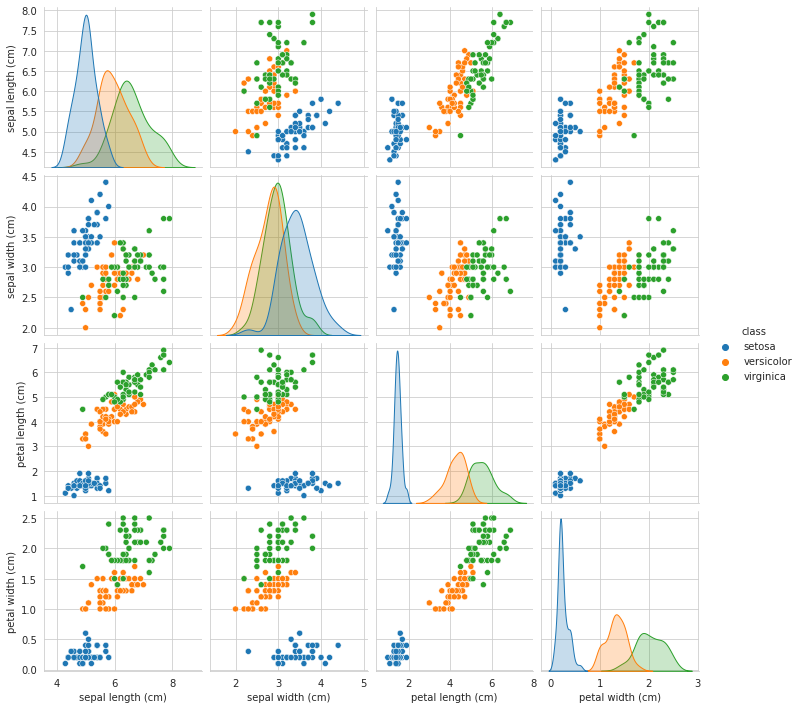

In [ ]:
sns.pairplot(iris_df, hue='class')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


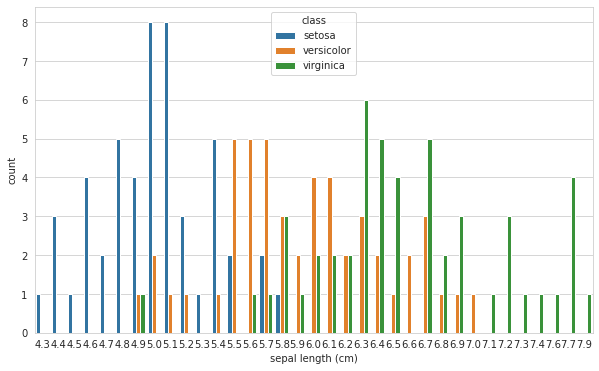

In [ ]:
# More visualization
plt.figure(figsize=(10,6))
sns.countplot(iris_df['sepal length (cm)'], 
              hue=iris_df['class'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


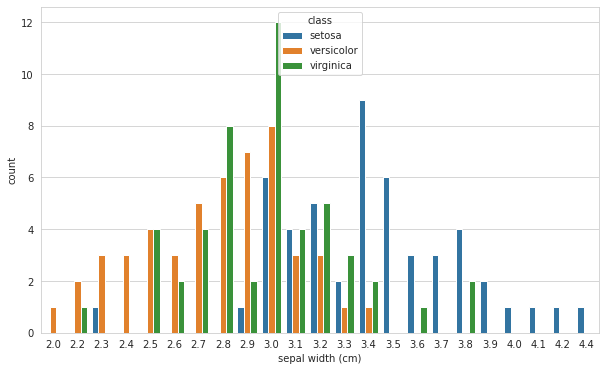

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(iris_df['sepal width (cm)'], 
              hue=iris_df['class'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


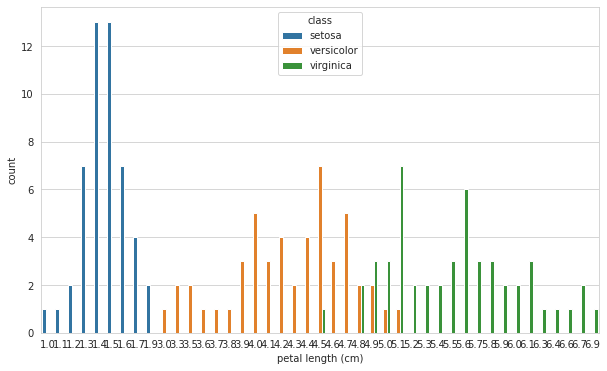

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(iris_df['petal length (cm)'], 
              hue=iris_df['class'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


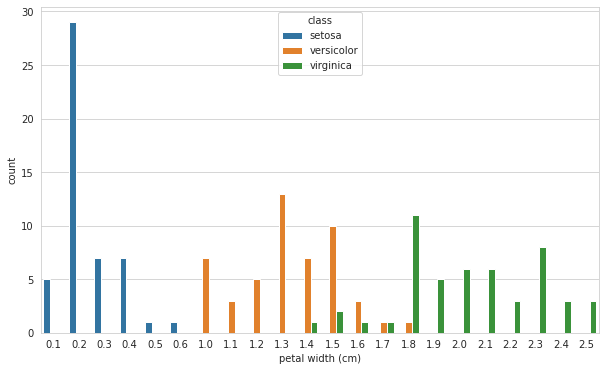

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(iris_df['petal width (cm)'], 
              hue=iris_df['class'])
plt.show()

In [ ]:
# Import 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [ ]:
# train test split
X = iris_df.drop('class', axis=1)
y = iris_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
# Logistic regression
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print(f'The accuracy in the training data: {metrics.accuracy_score(y_train, log_reg.predict(X_train))}.')
print(f'The accuracy in the trianing data: {log_reg.score(X_train, y_train)}.')
print(f'The accuracy in the testing data: {metrics.accuracy_score(y_test, log_reg.predict(X_test))}.')
print(f'The accuracy in the testing data: {log_reg.score(X_test, y_test)}.')

The accuracy in the training data: 0.9666666666666667.
The accuracy in the trianing data: 0.9666666666666667.
The accuracy in the testing data: 0.9333333333333333.
The accuracy in the testing data: 0.9333333333333333.


In [ ]:
# K nearest neighbor classification
training_accuracy = []
testing_accuracy = []
for i in range(20):
  knn = KNeighborsClassifier(n_neighbors=i+1).fit(X_train, y_train)
  training_accuracy.append(knn.score(X_train, y_train))
  testing_accuracy.append(knn.score(X_test, y_test))

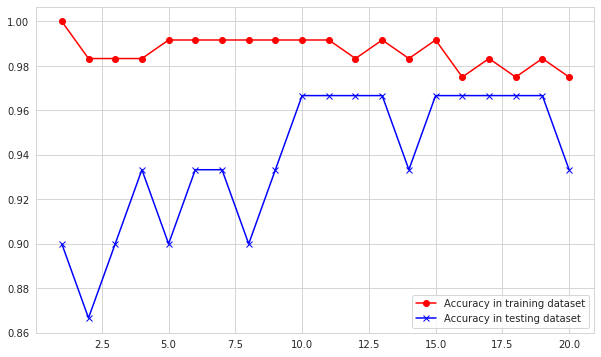

In [ ]:
plt.figure(figsize=(10,6)) 
plt.plot(range(1,21,1),
         training_accuracy,
         marker = 'o',
         color = 'red',
         label = 'Accuracy in training dataset')
plt.plot(range(1,21,1),
         testing_accuracy,
         marker = 'x',
         color = 'blue',
         label = 'Accuracy in testing dataset')
plt.legend()
plt.show()

In [ ]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

In [ ]:
gnb = GaussianNB().fit(X_train, y_train)
mnb = MultinomialNB().fit(X_train, y_train)
cnb = ComplementNB().fit(X_train, y_train)
bnb = BernoulliNB().fit(X_train, y_train)
catenb = CategoricalNB().fit(X_train, y_train)

In [ ]:
# Accuracies
print(f'With GaussianNB, the accuracy in training data is {gnb.score(X_train, y_train)}.')
print(f'With MultinomialNB, the accuracy in training data is {mnb.score(X_train, y_train)}.')
print(f'With ComplementNB, the accuracy in training data is {cnb.score(X_train, y_train)}.')
print(f'With BernoulliNB, the accuracy in training data is {bnb.score(X_train, y_train)}.')
print(f'With CategoricalNB, the accuracy in training data is {catenb.score(X_train, y_train)}.')

print(f'With GaussianNB, the accuracy in testing data is {gnb.score(X_test, y_test)}.')
print(f'With MultinomialNB, the accuracy in testing data is {mnb.score(X_test, y_test)}.')
print(f'With ComplementNB, the accuracy in testing data is {cnb.score(X_test, y_test)}.')
print(f'With BernoulliNB, the accuracy in testing data is {bnb.score(X_test, y_test)}.')
print(f'With CategoricalNB, the accuracy in testing data is {catenb.score(X_test, y_test)}.')

With GaussianNB, the accuracy in training data is 0.975.
With MultinomialNB, the accuracy in training data is 0.8916666666666667.
With ComplementNB, the accuracy in training data is 0.6583333333333333.
With BernoulliNB, the accuracy in training data is 0.3416666666666667.
With CategoricalNB, the accuracy in training data is 0.9416666666666667.
With GaussianNB, the accuracy in testing data is 0.9.
With MultinomialNB, the accuracy in testing data is 0.9.
With ComplementNB, the accuracy in testing data is 0.7.
With BernoulliNB, the accuracy in testing data is 0.3.
With CategoricalNB, the accuracy in testing data is 0.9.


In [ ]:
# support vector classification (kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} )
from sklearn.svm import SVC

linear_svc = SVC(kernel = 'poly').fit(X_train, y_train)
poly_svc = SVC(kernel = 'poly').fit(X_train, y_train)
rbf_svc = SVC(kernel = 'rbf').fit(X_train, y_train)
sig_svc = SVC(kernel = 'sigmoid').fit(X_train, y_train)
#pre_svc = SVC(kernel = 'precomputed').fit(X_train, y_train)

In [ ]:
# accuracies

print(f'For SVC that uses linear kernal:')
print(f'The accuracy in the training dataset is: {linear_svc.score(X_train, y_train)}.')
print(f'The accuracy in the testing dataset is: {linear_svc.score(X_test, y_test)}.')
print('\n')
print(f'For SVC that uses poly kernal:')
print(f'The accuracy in the training dataset is: {poly_svc.score(X_train, y_train)}.')
print(f'The accuracy in the testing dataset is: {poly_svc.score(X_test, y_test)}.')
print('\n')
print(f'For SVC that uses rbf kernal:')
print(f'The accuracy in the training dataset is: {rbf_svc.score(X_train, y_train)}.')
print(f'The accuracy in the testing dataset is: {rbf_svc.score(X_test, y_test)}.')
print('\n')
print(f'For SVC that uses sigmoid kernal:')
print(f'The accuracy in the training dataset is: {sig_svc.score(X_train, y_train)}.')
print(f'The accuracy in the testing dataset is: {sig_svc.score(X_test, y_test)}.')

For SVC that uses linear kernal:
The accuracy in the training dataset is: 0.9833333333333333.
The accuracy in the testing dataset is: 0.9333333333333333.


For SVC that uses poly kernal:
The accuracy in the training dataset is: 0.9833333333333333.
The accuracy in the testing dataset is: 0.9333333333333333.


For SVC that uses rbf kernal:
The accuracy in the training dataset is: 0.95.
The accuracy in the testing dataset is: 0.9333333333333333.


For SVC that uses sigmoid kernal:
The accuracy in the training dataset is: 0.20833333333333334.
The accuracy in the testing dataset is: 0.3333333333333333.


In [ ]:
# Random forest classification
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)
print(f'The accuracy with the training dataset is: {rfc.score(X_train, y_train)}')
print(f'The accuracy with the testing dataset is: {rfc.score(X_test, y_test)}')

The accuracy with the training dataset is: 1.0
The accuracy with the testing dataset is: 0.9333333333333333
